### New Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

from magnetar_old import magnetar_old
from magnetar import magnetar

In [8]:
magnetar_old_i = magnetar_old(M_NS=1.4,R_NS=10,gamma=0,delta=0,decay_a=0,decay_alpha=1.25,B0=1E+15,
                         v_m=2.65E+7,rho_m=1/6.022E+23,t0=0,
                         P0=0.1,t_obvs=3.16e+16)
    
magnetar_old_i.Integratedipole()
    
if magnetar_old_i.obvs_type == '0':
    magnetar_old_i.Integrateprop()

magnetar_old_i.ProdNumerOutput()

In [15]:
magnetar_i_nograv = magnetar(gamma=1, delta=1, B_i=1E+15, v_NS=265, rho_0=1/6.022E+23, P0=0.1, t_obvs=3.16e+16, M_NS=1.4, R_NS=10, t0=0, 
                 grav_correction=False, B_decay=True, dipole_only=False)
    
magnetar_i_nograv.run()

In [16]:
magnetar_i = magnetar(gamma=1, delta=1, B_i=1E+15, v_NS=265, rho_0=1/6.022E+23, P0=0.1, t_obvs=3.16e+16, M_NS=1.4, R_NS=10, t0=0, 
                 grav_correction=True, B_decay=True, dipole_only=False)
    
magnetar_i.run()

Text(0, 0.5, 'Pdot [s/s]')

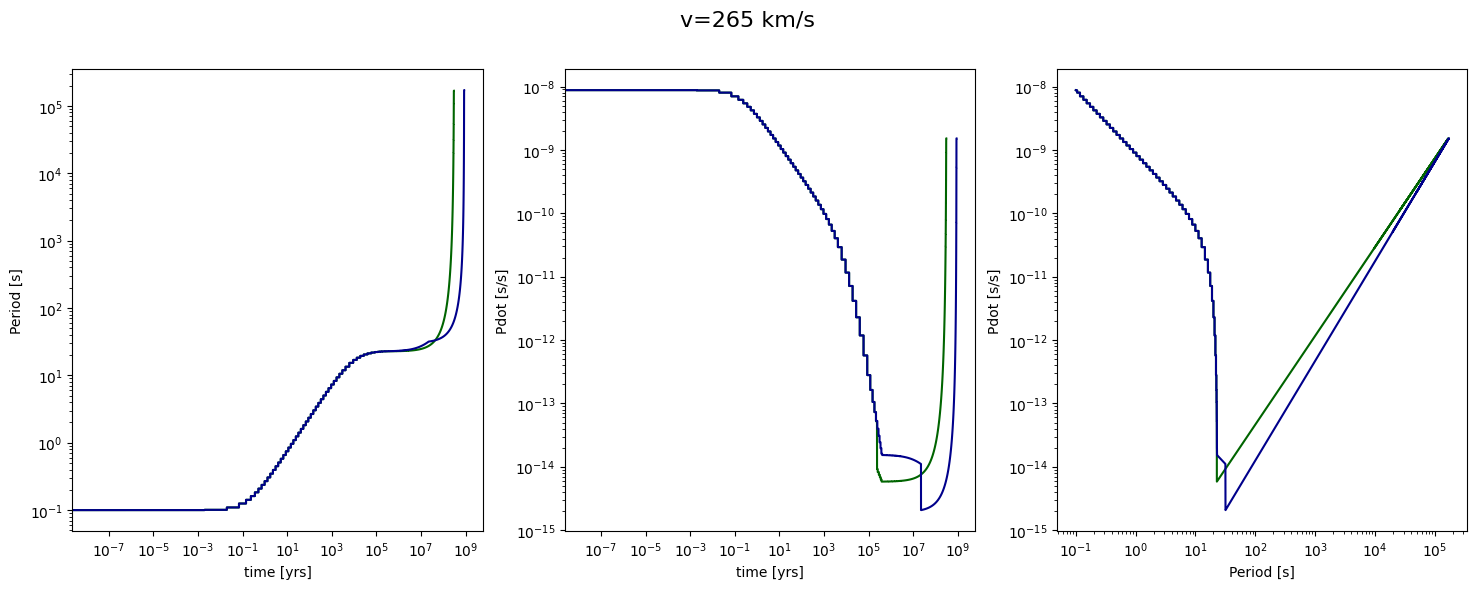

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_figheight(6)
fig.set_figwidth(18)
fig.suptitle('v=265 km/s',fontsize=16)

ax1.plot(magnetar_i.t_arr.to(u.year), magnetar_i.P_arr, ds="steps-mid",color='darkgreen',label='unbinned')
ax2.plot(magnetar_i.t_arr.to(u.year), magnetar_i.dP_arr, ds="steps-mid", color='darkgreen',label='binned')
ax3.plot(magnetar_i.P_arr, magnetar_i.dP_arr, ds="steps-mid", color='darkgreen',label='binned')
ax1.plot(magnetar_i_nograv.t_arr.to(u.year), magnetar_i_nograv.P_arr, ds="steps-mid",color='darkblue',label='unbinned')
ax2.plot(magnetar_i_nograv.t_arr.to(u.year), magnetar_i_nograv.dP_arr, ds="steps-mid", color='darkblue',label='binned')
ax3.plot(magnetar_i_nograv.P_arr, magnetar_i_nograv.dP_arr, ds="steps-mid", color='darkblue',label='binned')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax3.set_xscale('log')
ax3.set_yscale('log')


ax1.set_xlabel('time [yrs]')
ax1.set_ylabel('Period [s]')


ax2.set_xlabel('time [yrs]')
ax2.set_ylabel('Pdot [s/s]')

ax3.set_xlabel('Period [s]')
ax3.set_ylabel('Pdot [s/s]')

In [20]:
magnetar_i_nograv = magnetar(gamma=1, delta=1, B_i=1E+15, v_NS=100, rho_0=1/6.022E+23, P0=0.1, t_obvs=3.16e+16, M_NS=1.4, R_NS=10, t0=0, 
                 grav_correction=False, B_decay=True, dipole_only=False)
    
magnetar_i_nograv.run()

In [21]:
magnetar_i = magnetar(gamma=1, delta=1, B_i=1E+15, v_NS=100, rho_0=1/6.022E+23, P0=0.1, t_obvs=3.16e+16, M_NS=1.4, R_NS=10, t0=0, 
                 grav_correction=True, B_decay=True, dipole_only=False)
    
magnetar_i.run()

Text(0, 0.5, 'Pdot [s/s]')

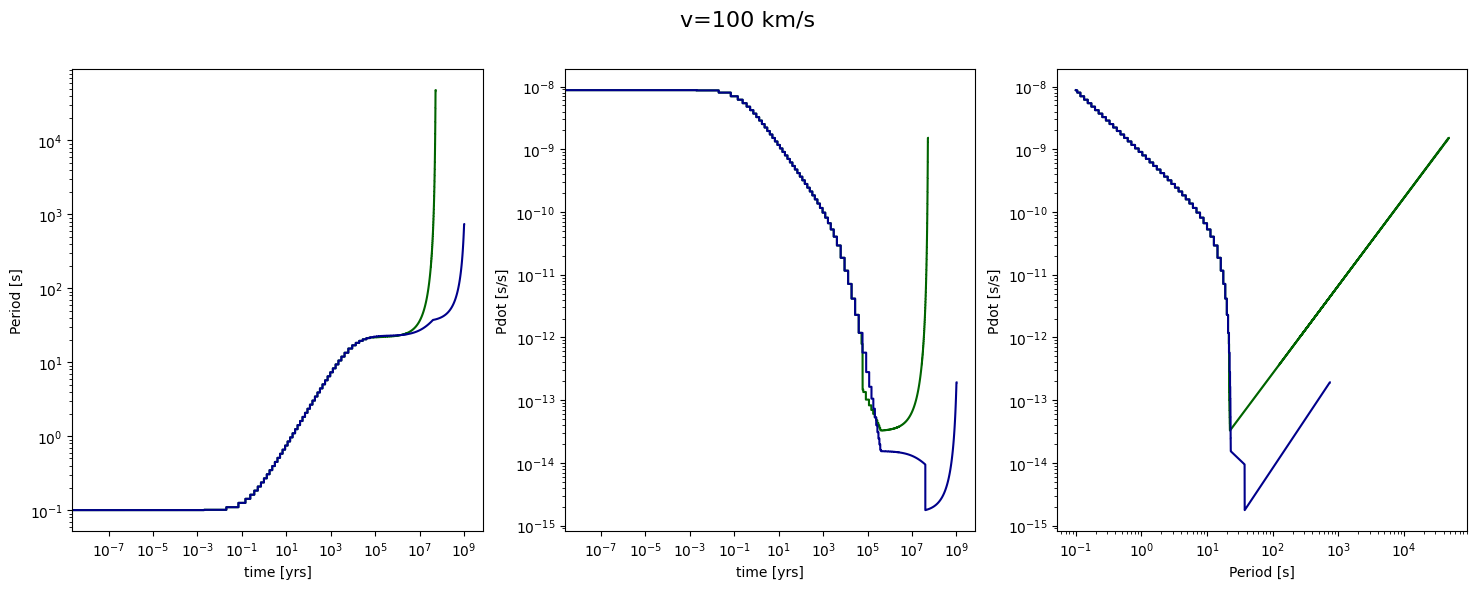

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_figheight(6)
fig.set_figwidth(18)
fig.suptitle('v=100 km/s',fontsize=16)

ax1.plot(magnetar_i.t_arr.to(u.year), magnetar_i.P_arr, ds="steps-mid",color='darkgreen',label='unbinned')
ax2.plot(magnetar_i.t_arr.to(u.year), magnetar_i.dP_arr, ds="steps-mid", color='darkgreen',label='binned')
ax3.plot(magnetar_i.P_arr, magnetar_i.dP_arr, ds="steps-mid", color='darkgreen',label='binned')
ax1.plot(magnetar_i_nograv.t_arr.to(u.year), magnetar_i_nograv.P_arr, ds="steps-mid",color='darkblue',label='unbinned')
ax2.plot(magnetar_i_nograv.t_arr.to(u.year), magnetar_i_nograv.dP_arr, ds="steps-mid", color='darkblue',label='binned')
ax3.plot(magnetar_i_nograv.P_arr, magnetar_i_nograv.dP_arr, ds="steps-mid", color='darkblue',label='binned')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax3.set_xscale('log')
ax3.set_yscale('log')


ax1.set_xlabel('time [yrs]')
ax1.set_ylabel('Period [s]')


ax2.set_xlabel('time [yrs]')
ax2.set_ylabel('Pdot [s/s]')

ax3.set_xlabel('Period [s]')
ax3.set_ylabel('Pdot [s/s]')

In [23]:
magnetar_i_nograv = magnetar(gamma=1, delta=1, B_i=1E+15, v_NS=50, rho_0=1/6.022E+23, P0=0.1, t_obvs=3.16e+16, M_NS=1.4, R_NS=10, t0=0, 
                 grav_correction=False, B_decay=True, dipole_only=False)
    
magnetar_i_nograv.run()

In [24]:
magnetar_i = magnetar(gamma=1, delta=1, B_i=1E+15, v_NS=50, rho_0=1/6.022E+23, P0=0.1, t_obvs=3.16e+16, M_NS=1.4, R_NS=10, t0=0, 
                 grav_correction=True, B_decay=True, dipole_only=False)
    
magnetar_i.run()

Text(0, 0.5, 'Pdot [s/s]')

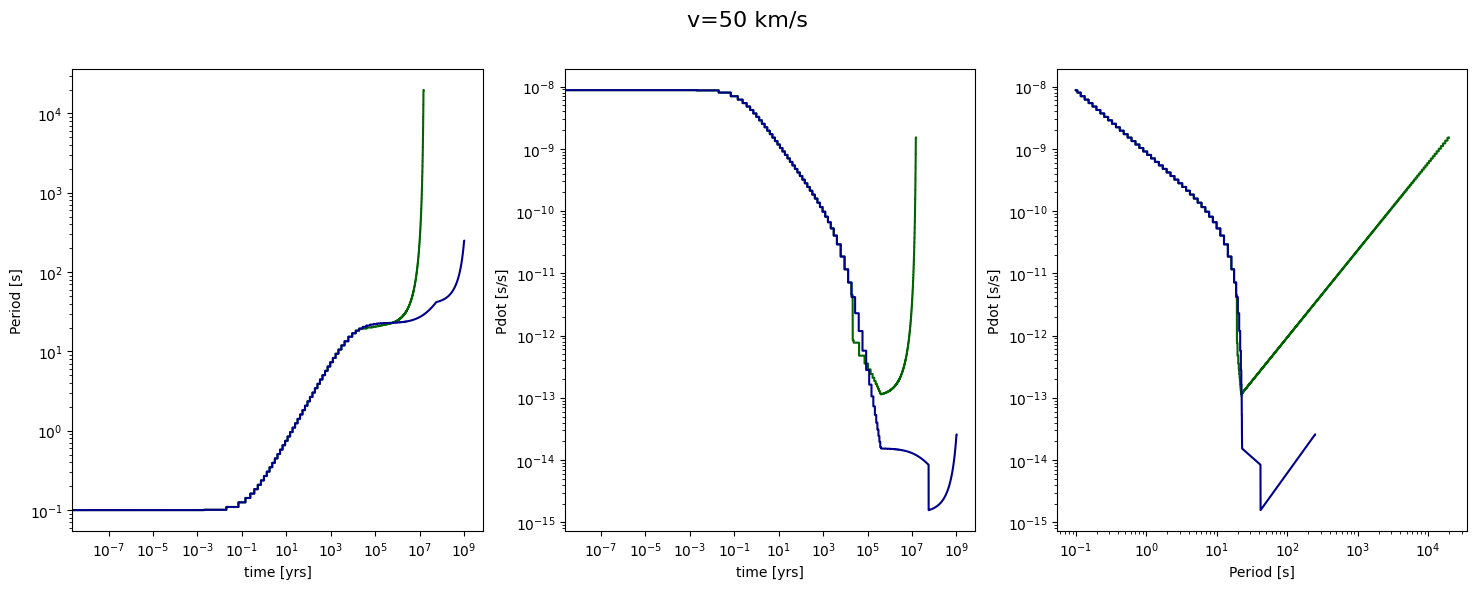

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_figheight(6)
fig.set_figwidth(18)
fig.suptitle('v=50 km/s',fontsize=16)

ax1.plot(magnetar_i.t_arr.to(u.year), magnetar_i.P_arr, ds="steps-mid",color='darkgreen',label='unbinned')
ax2.plot(magnetar_i.t_arr.to(u.year), magnetar_i.dP_arr, ds="steps-mid", color='darkgreen',label='binned')
ax3.plot(magnetar_i.P_arr, magnetar_i.dP_arr, ds="steps-mid", color='darkgreen',label='binned')
ax1.plot(magnetar_i_nograv.t_arr.to(u.year), magnetar_i_nograv.P_arr, ds="steps-mid",color='darkblue',label='unbinned')
ax2.plot(magnetar_i_nograv.t_arr.to(u.year), magnetar_i_nograv.dP_arr, ds="steps-mid", color='darkblue',label='binned')
ax3.plot(magnetar_i_nograv.P_arr, magnetar_i_nograv.dP_arr, ds="steps-mid", color='darkblue',label='binned')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax3.set_xscale('log')
ax3.set_yscale('log')


ax1.set_xlabel('time [yrs]')
ax1.set_ylabel('Period [s]')


ax2.set_xlabel('time [yrs]')
ax2.set_ylabel('Pdot [s/s]')

ax3.set_xlabel('Period [s]')
ax3.set_ylabel('Pdot [s/s]')